<a href="https://colab.research.google.com/github/Sjleerodls/Data_Analysis/blob/main/lab_da/ml15_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 차원 축소, 주성분 분석(PCA, Principal Component Analysis)

# Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA

# 데이터셋

In [3]:
!wget https://bit.ly/fruits_300 -O fruits.npy

--2025-08-19 02:45:50--  https://bit.ly/fruits_300
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy [following]
--2025-08-19 02:45:50--  https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy [following]
--2025-08-19 02:45:50--  https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443..

In [4]:
fruits = np.load('fruits.npy')  # npy 파일을 읽어서 numpy 배열 생성

In [6]:
fruits.shape    # (samples, width, height)

(300, 100, 100)

In [19]:
def plot_array(arr, ncols=10):
    # arr : (samples, width, height) shape의 3차원 배열로 가정
    n = len(arr)    # 샘플 개수
    nrows = int(np.ceil(n / ncols))
    fig, ax = plt.subplots(nrows, ncols, figsize=(ncols, nrows))

    for i in range(nrows):
        for j in range(ncols):
            idx = i * ncols + j
            if nrows == 1:  # ax는 1차원 ndarray
                if idx < n: # 샘플이 있는 경우
                    ax[idx].imshow(arr[idx], cmap=plt.cm.binary)
                ax[idx].axis('off')
            else:           # ax는 2차원 배열
                if idx < n:
                    ax[i, j].imshow(arr[idx], cmap=plt.cm.binary)
                ax[i,j].axis('off')
    plt.show()

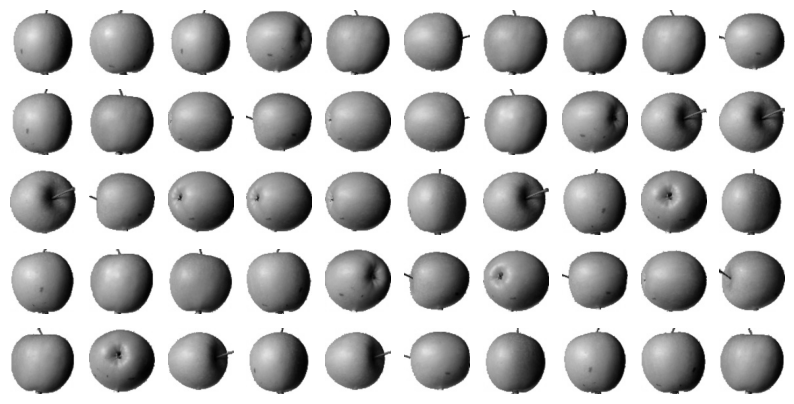

In [20]:
plot_array(fruits[:50])

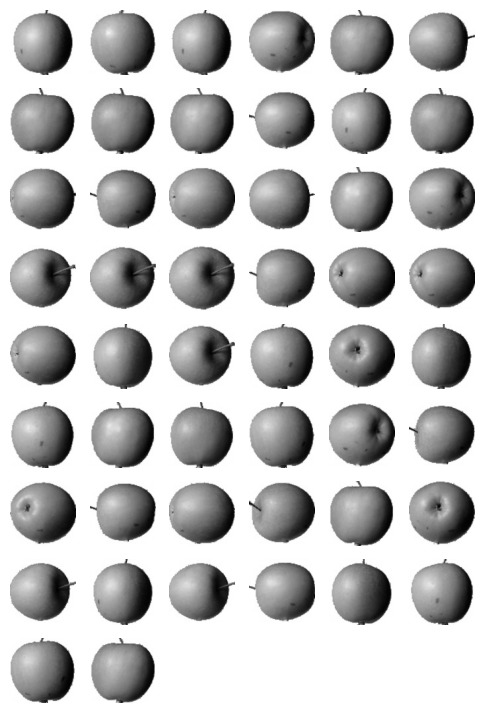

In [21]:
plot_array(fruits[:50], ncols=6)

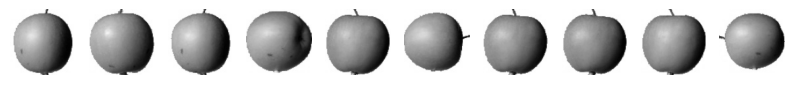

In [23]:
plot_array(fruits[:10])

# PCA

In [24]:
# scikit-learn 클래스를 사용하기 위해서 3d ndarray를 2d ndarray로 변환
fruits_2d = fruits.reshape((300, -1))

In [25]:
fruits_2d.shape

(300, 10000)